Student ID: 19012516

# The tasks this week are:

1 Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to 𝑦𝑛𝑜𝑖𝑠𝑒, where 𝑦𝑛𝑜𝑖𝑠𝑒 is a configurable parameter. 
<p>2 Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher) 
<p>3 Without retraining your network use this network to make a plot of test accuracy vs 𝑦𝑛𝑜𝑖𝑠𝑒 (so run the network repeatedly on the test dataset each time adding a differing noise contribution) 
<p>4 Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3.
<p>5 What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?




In [3]:
#standard imports and parameters copied in from Week3_MNIST_TF.ipynb
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

In [4]:
#load MNIST dataset. Copied in from Week3_MNIST_TF.ipynb
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#From Week3_MNIST_TF.ipynb
train_images = train_images/255.0#to normalise
test_images = test_images/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#Task 1
def add_noise(images, y_noise):#pass in images you want to add noise to, y_noise - scales uniform distribution.
    '''input: images - an array of different lengths of 28*28 values like MNIST samples
              y_noise - a float
      function: adds a noise component to each item in images (uniform distribution from 0 to y_noise) and normalised        
      output: an array the same size and shape as images. 
    '''
    
    #all MNIST images are 28*28; but number of images can differ, e.g. training_images contains 60,000 images, while test_images has 10,000
    #this difference is captured by len(images)
    #np.random.rand populates an array of a given shape in this case (len(images),28,28) with a uniform distribution from 0 to 1.
    #adapted from https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
    #this array of random numbers is then scaled with y_noise and added to the image array
    #the total is normalised as elements in array will vary from 0 to 1+y_noise
    
    images_with_noise = (y_noise * np.random.rand(len(images),28,28) + images)/ (1+y_noise)


    return images_with_noise#calculated array returned

Training images elements range from: 
0.0 to 1.0

Training images with noise elements y_noise = 1 added range from: 
 1.506529612171903e-08 to 0.9999951151966586


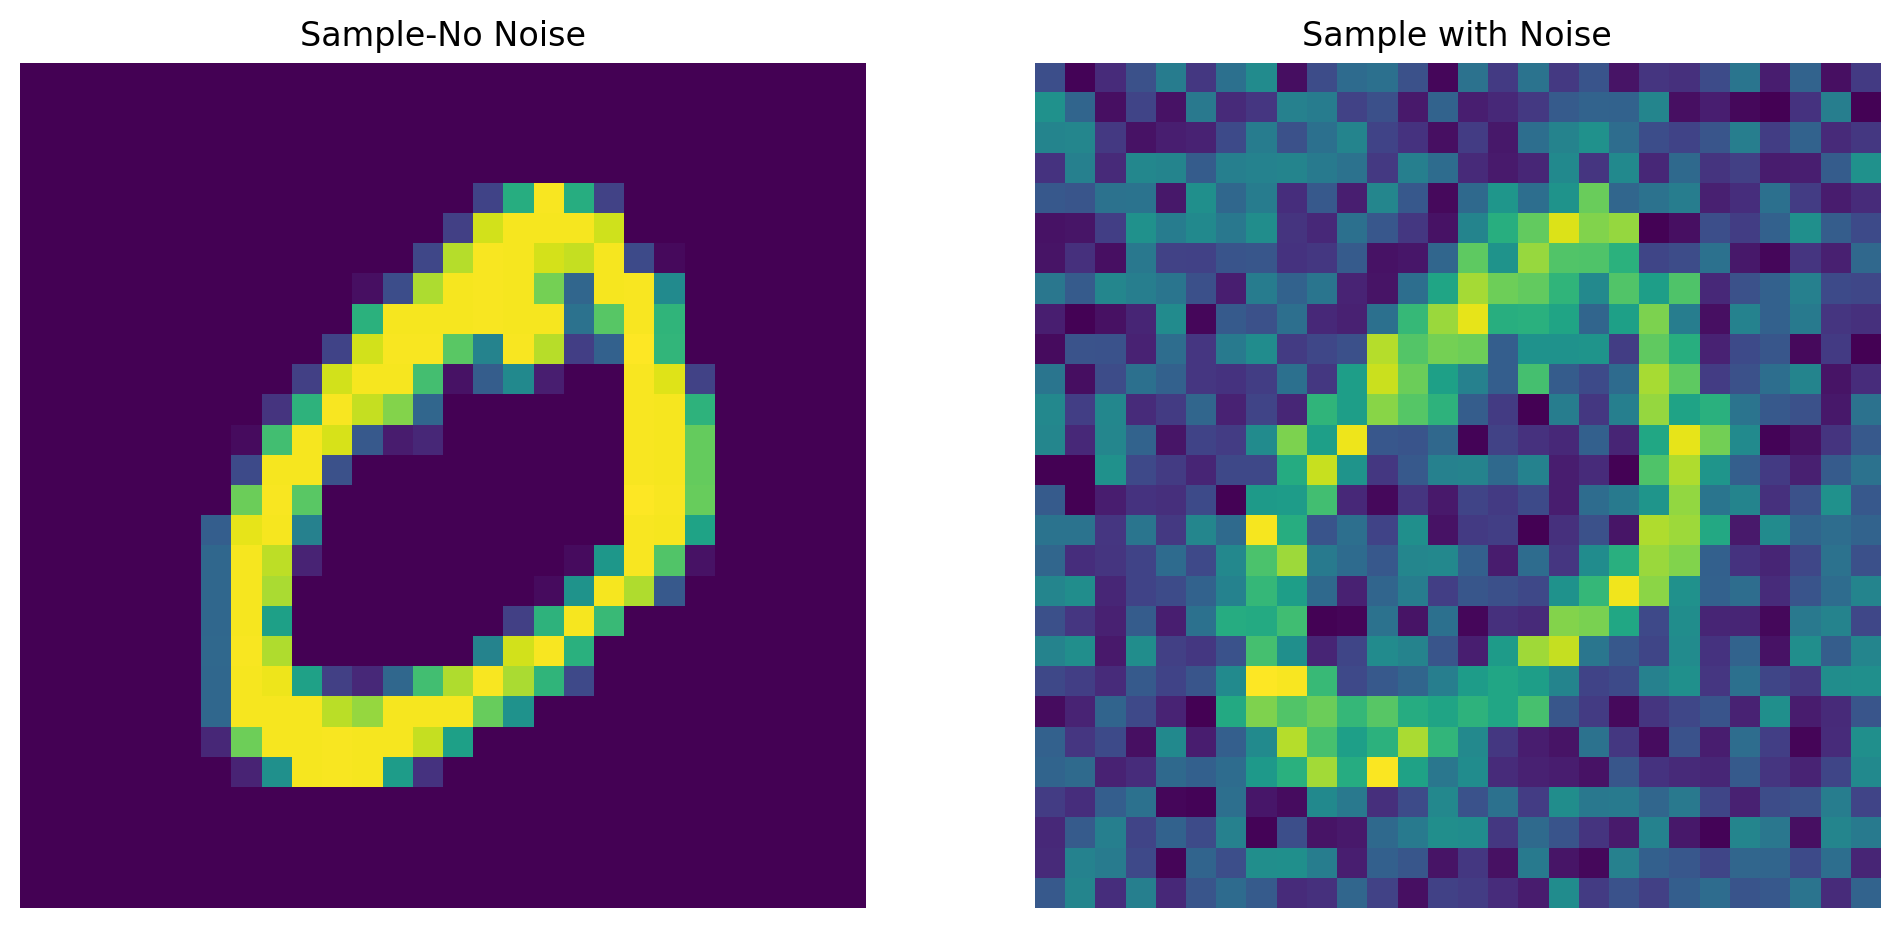

In [6]:
#Example to test function add_noise
print(f'Training images elements range from: \n{np.min(train_images)} to {np.max(train_images)}')
train_images_noise = add_noise(train_images,1)
print(f'\nTraining images with noise elements y_noise = 1 added range from: \n {np.min(train_images_noise)} to {np.max(train_images_noise)}')
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(train_images[1])
ax1.axis('off')
ax1.set_title("Sample-No Noise")
ax2.imshow(train_images_noise[1])
ax2.axis('off')
ax2.set_title("Sample with Noise");

# Task 1
*add_noise* function designed with normalisation. Seems to be working well.
# Notes on Task 2
Now the models needs to be compiled, trained and tested. The following code cell has been copied from *Week3_MNIST_TF.ipynb*. Only change is a small one to suppress an unnecessary error message, by using current keras terminology for learning rate. 

In [7]:
#same model as in Week3_MNIST_TF.ipynb
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

#same compiler as in Week3_MNIST_TF.ipynb except:
#'lr'changed to 'learning_rate' to suppress error message about deprecation of 'lr'
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

#same as in Week3_MNIST_TF.ipynb
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

#same as in Week3_MNIST_TF.ipynb
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3131 - accuracy: 0.9040
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1237 - accuracy: 0.9621
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0946 - accuracy: 0.9709
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0751 - accuracy: 0.9763
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9832
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0453 - accuracy: 0.9854
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0396 - accuracy: 0.9872
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.9887
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0305 - accuracy: 0.9904

# Task 2 complete
A high degree of accuracy of 98% was obtained, and better than the 95% targetted in the Task outline. Therefore, the training model from *Week3_MNIST_TF.ipynb* produced 'acceptable performance' and could be used for the later tasks.

# Notes on Task 3
Approach:
<p>Loop through values of y_noise
<p>Test fitted model accuracy versus test images with different levels of y_noise applied
<p>After loop, plot graph of Accuracy v y_noise





313/313 - 0s - loss: 0.1109 - accuracy: 0.9794
313/313 - 0s - loss: 0.1864 - accuracy: 0.9530
313/313 - 0s - loss: 0.7506 - accuracy: 0.8010
313/313 - 0s - loss: 1.5031 - accuracy: 0.6429
313/313 - 0s - loss: 2.0753 - accuracy: 0.5389
313/313 - 0s - loss: 2.4706 - accuracy: 0.4721
313/313 - 0s - loss: 2.7849 - accuracy: 0.4108
313/313 - 0s - loss: 3.0090 - accuracy: 0.3755
313/313 - 0s - loss: 3.1634 - accuracy: 0.3505
313/313 - 0s - loss: 3.3570 - accuracy: 0.3222
313/313 - 0s - loss: 3.5151 - accuracy: 0.2996
313/313 - 0s - loss: 3.6190 - accuracy: 0.2897
313/313 - 0s - loss: 3.7211 - accuracy: 0.2796
313/313 - 0s - loss: 3.8272 - accuracy: 0.2631
313/313 - 0s - loss: 3.9211 - accuracy: 0.2590
313/313 - 0s - loss: 4.0009 - accuracy: 0.2541
313/313 - 0s - loss: 4.0906 - accuracy: 0.2423
313/313 - 0s - loss: 4.1583 - accuracy: 0.2339
313/313 - 0s - loss: 4.2266 - accuracy: 0.2260
313/313 - 0s - loss: 4.3167 - accuracy: 0.2197
313/313 - 0s - loss: 4.3477 - accuracy: 0.2158
313/313 - 0s 

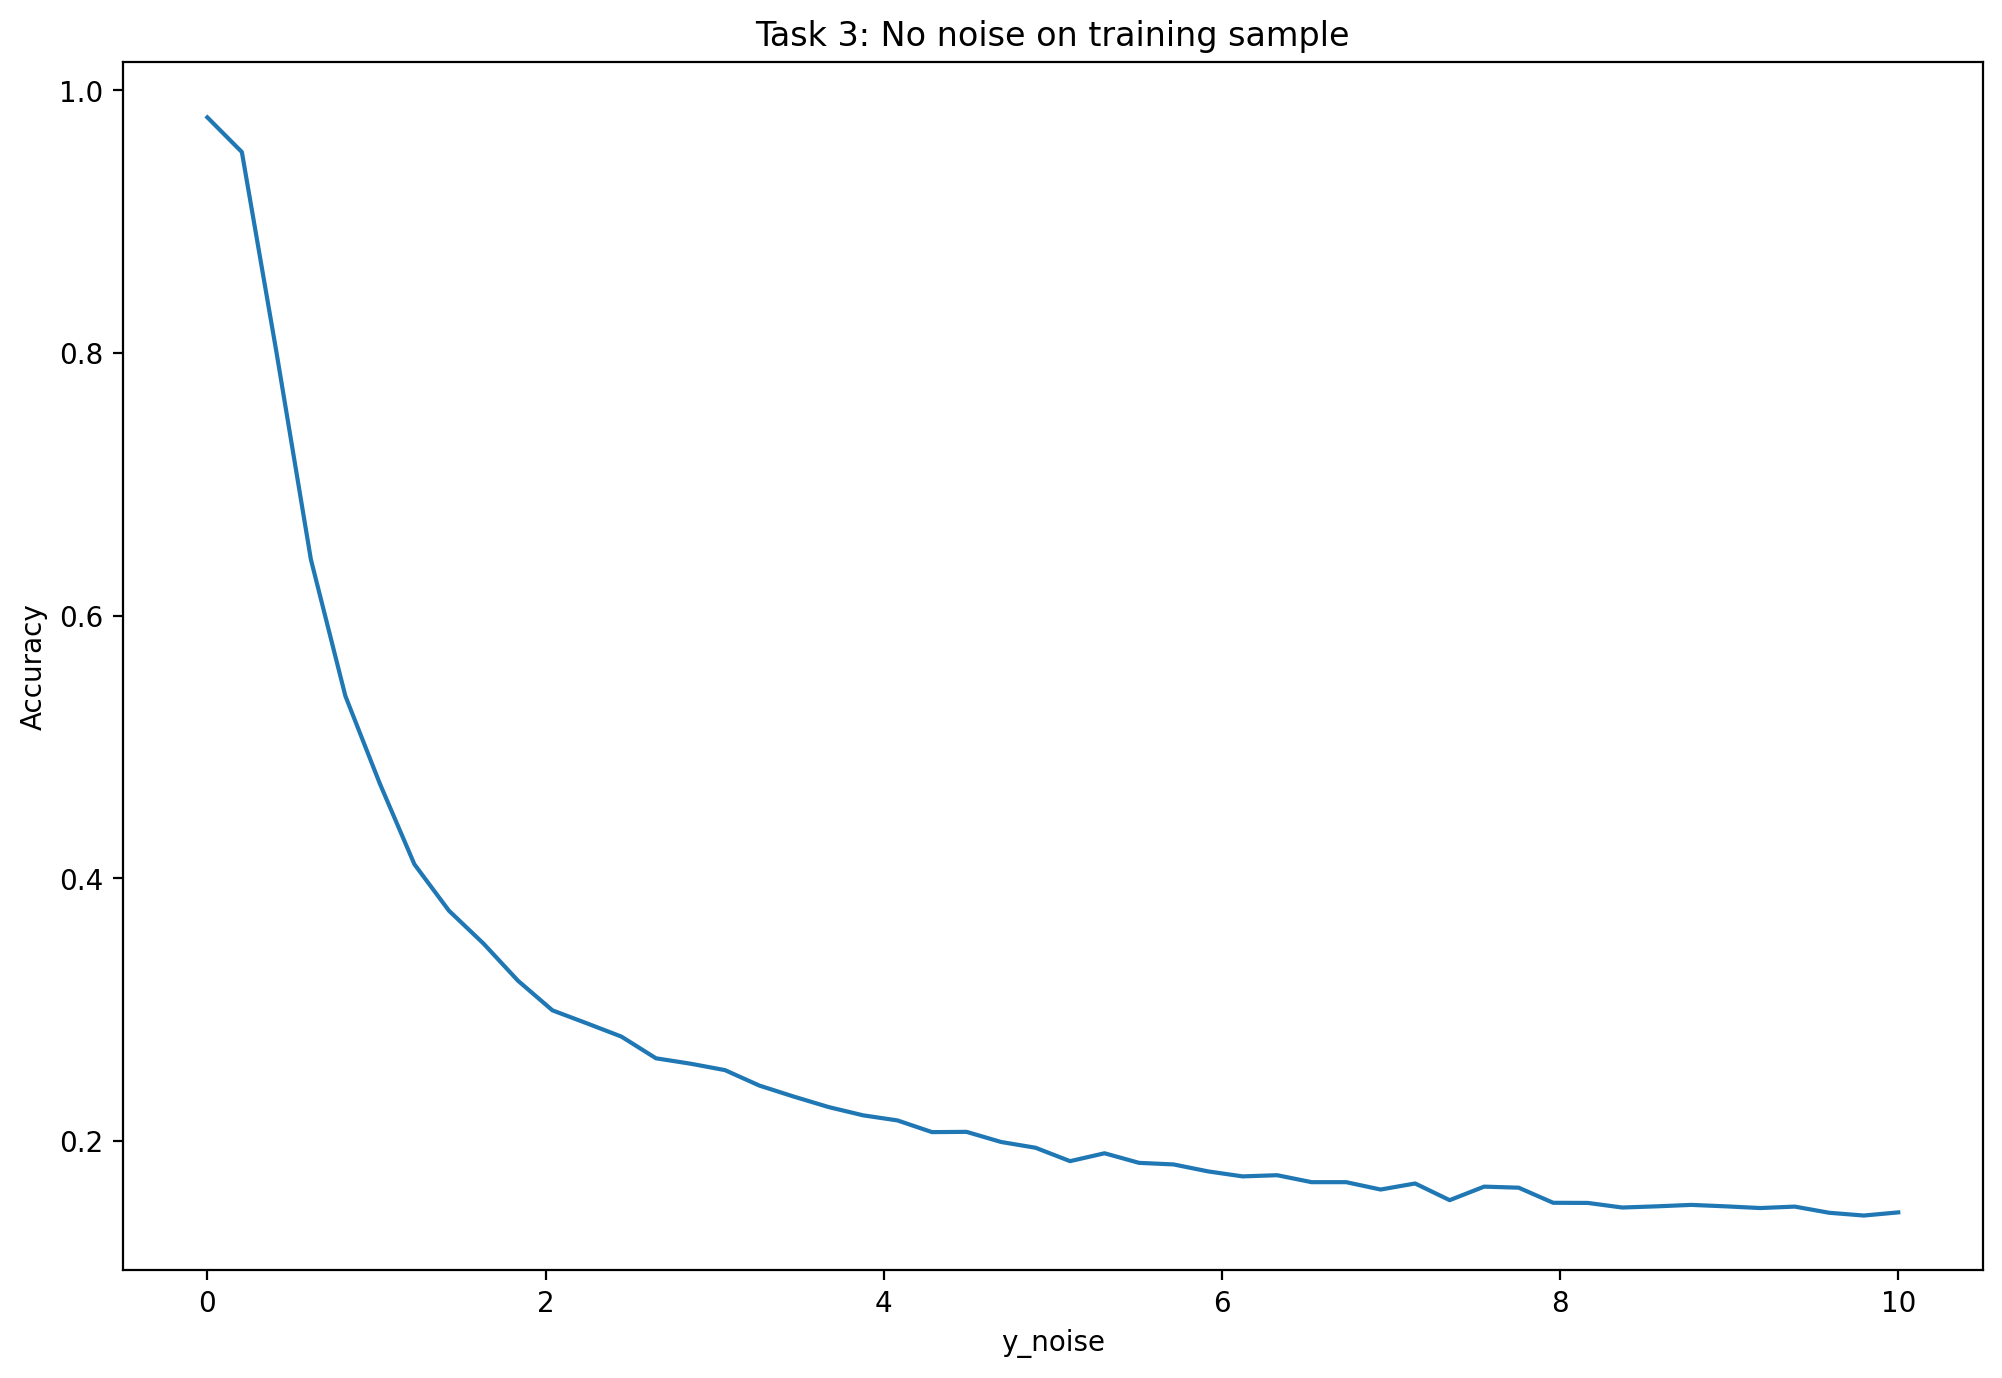

In [8]:
acc0 = []# empty list to collect test accuracy values
         #acc0: zero indicates accuracy with no noise on training sample
y_noise_array = np.linspace(0,10,50)# run from 0 to 10
for y_noise in y_noise_array:#loop through values
  test_images_noise = add_noise(test_images, y_noise)
  test_loss, test_acc = model.evaluate(test_images_noise,  test_labels, verbose=2)
  acc0.append(test_acc)
fig,ax=plt.subplots()
ax.plot(y_noise_array, acc0)
ax.set_xlabel("y_noise")
ax.set_ylabel("Accuracy")
ax.set_title('Task 3: No noise on training sample');

# Task 3 completed. 
Unsurpisingly the accuracy of the model decreases from its starting value of c98% as more noise is added to the *test_sample*. It decreases rapidly at first, but then tails off and approaches 0.1, which is 1/(number of categories) as expected for a random process.


# Task 4, 5
In considering adding noise to *training_sample*, it was decided not to loop through a range of values of *tr_y_noise*. This would take too long, especially as it was not clear which the best level might be. 
<p>Instead it was decided to construct a single run with the following parameters set:
<p>*tr_y_noise* - noise factor to be applied to training set (to be updated for later runs).
<p>*acc1* - empty array to collect value for first run. Name changed between runs to indicate *tr_y_noise*, 
<p>e.g. *acc1* signifies *tr_y_noise=1*
<P>*acc0_5* signifies *tr_y_noise=0.5* 
<p>This allows arrays of accuracy to be collected for each run for potential later plotting.
<p>Finally a mean of the accuracy arrays was taken to give a single measure of the performance of each model over the whole range.

#Task 4
For the task it was decided to start with *tr_y_noise=1*. In the following code, the hash comments with *** indicate the parameters, parameter names or graphs which need to be changed between runs

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 6.4325 - accuracy: 0.1087
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3036 - accuracy: 0.1065
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3036 - accuracy: 0.1074
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3037 - accuracy: 0.1071
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3036 - accuracy: 0.1079
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3039 - accuracy: 0.1061
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1073
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3037 - accuracy: 0.1058
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3037 - accuracy: 0.1075
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3035 - accuracy: 0.1079

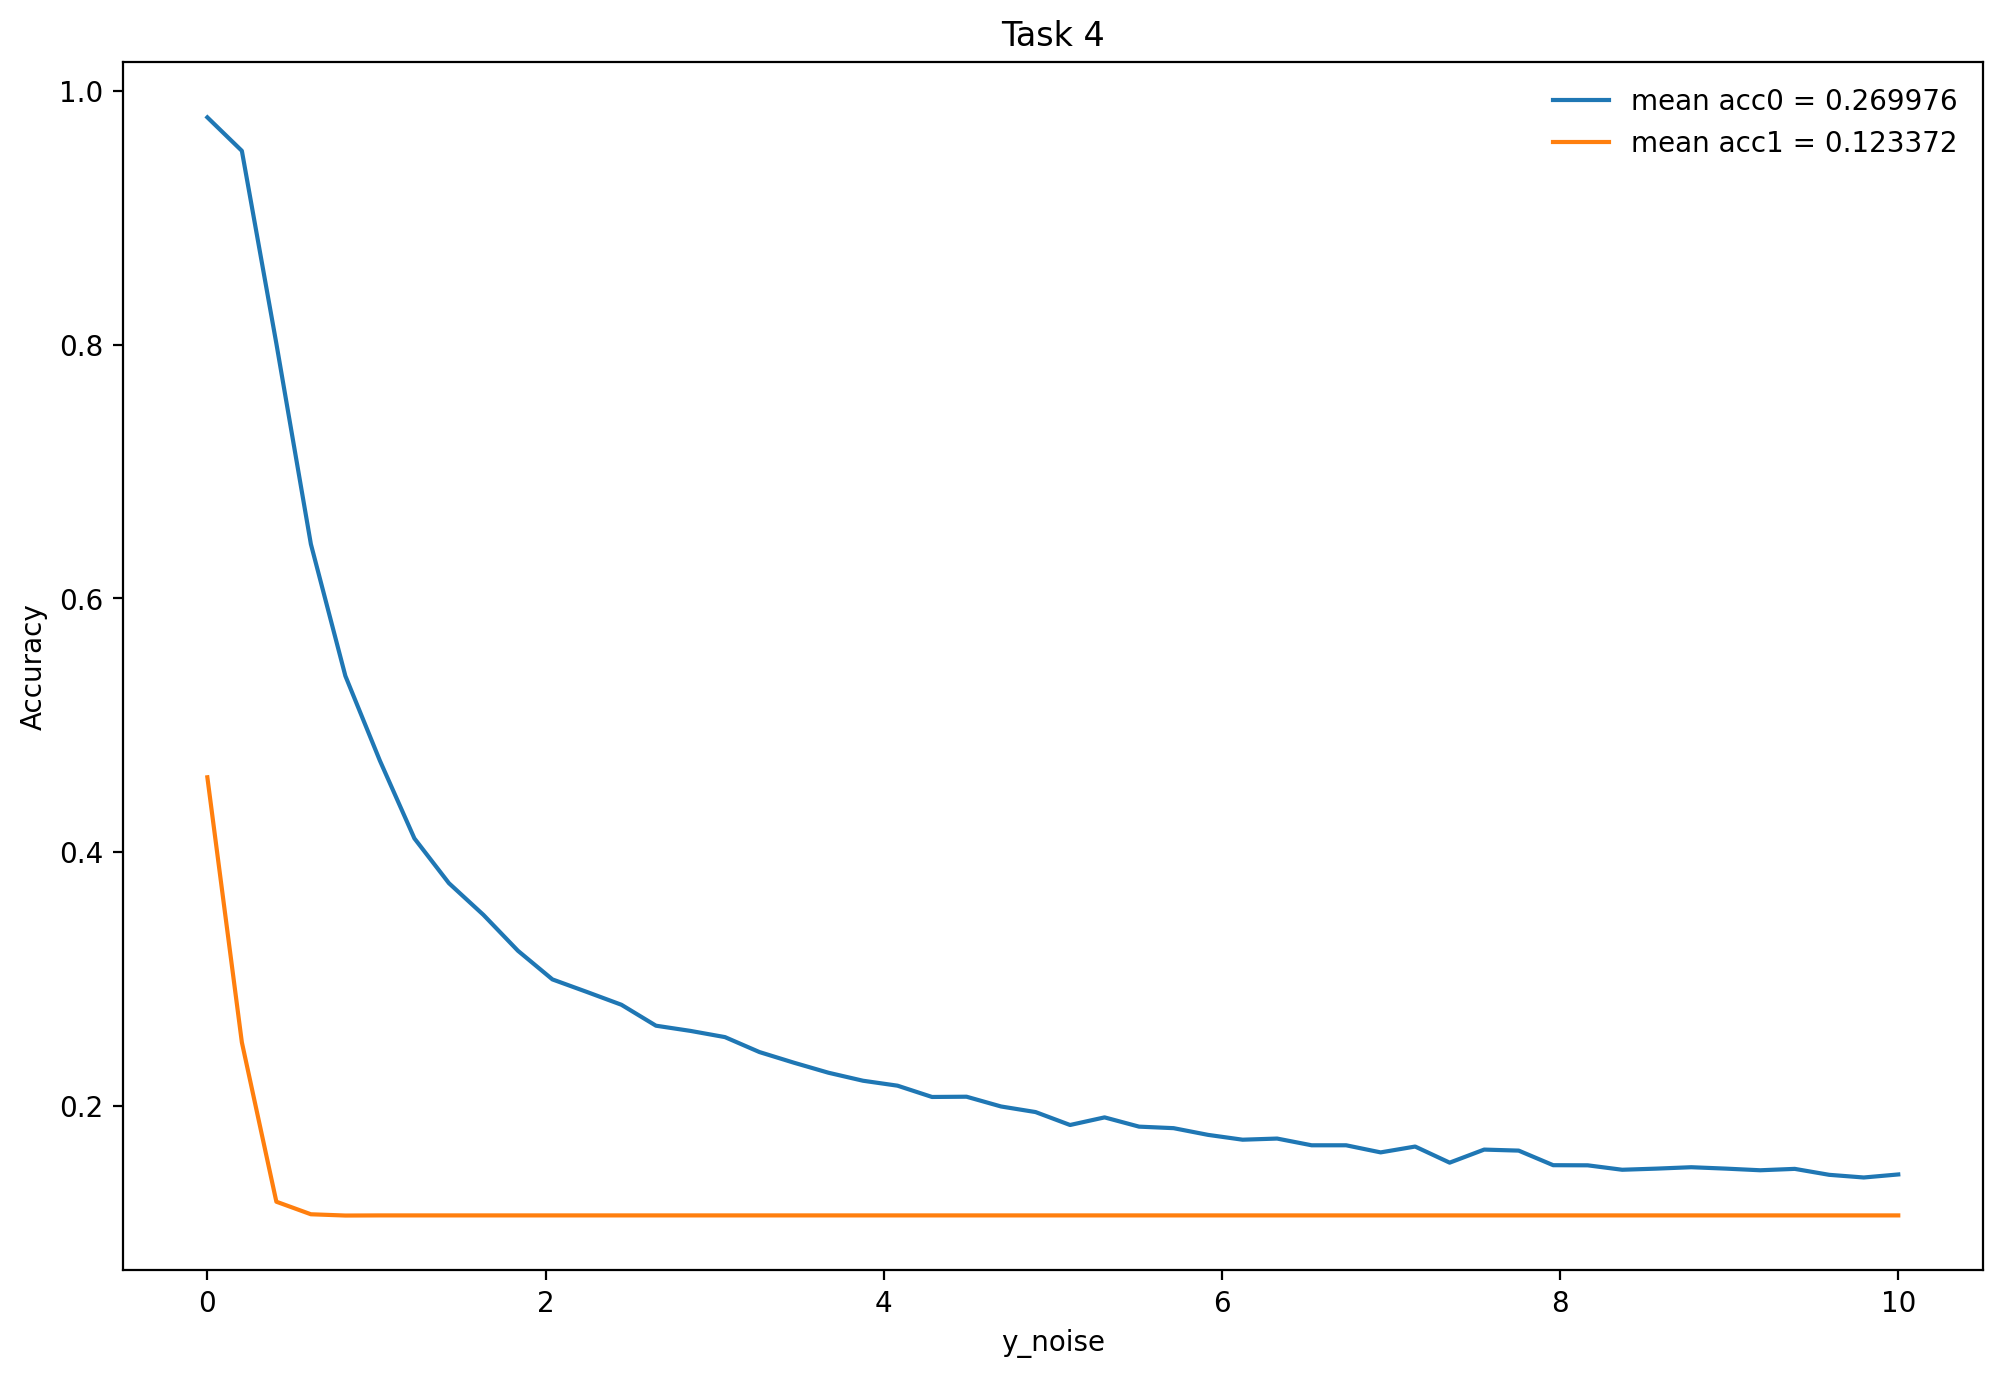

In [9]:
#***UPDATE BETWEEN RUNs***
tr_y_noise =1 #y_noise value for training set

#***UPDATE ARRAY NAME BETWEEN RUNS***
acc1 = []# empty list to collect test accuracy values

train_images_noise = add_noise(train_images, tr_y_noise)#add the noise

#adapted from Week3_MNIST_TF.ipynb
history=model.fit(train_images_noise, train_labels,batch_size=100, epochs=30)

y_noise_array = np.linspace(0,10,50)# run from 0 to 10
for y_noise in y_noise_array: #repeating Task 3
  test_images_noise = add_noise(test_images, y_noise)
  test_loss, test_acc = model.evaluate(test_images_noise,  test_labels, verbose=2)

#***UPDATE ARRAY NAME BETWEEN RUNS***  
  acc1.append(test_acc)

#UPDATE NAMES BETWEEN RUNs
avg_acc1 = np.mean(acc1)
avg_acc0 = np.mean(acc0)#only needed first time

fig,ax=plt.subplots()
#***UPDATE AS DESIRED BETWEEN RUNS***
ax.plot(y_noise_array, acc0, label = f'mean acc0 = {avg_acc0:0.6f}')
ax.plot(y_noise_array, acc1, label = f'mean acc1 = {avg_acc1:0.6f}')
ax.set_xlabel("y_noise")
ax.set_ylabel("Accuracy")
ax.set_title(f'Task 4')
ax.legend();

# Task 4 Completed
*tr_y_noise =1* showed that adding a lot of noise, did not work well. It may work better for smaller values. 

# Task 5
Approach:
<p>Start from tr_y_noise =0.25
<p>If appropriate increase in steps of 0.25


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1228 - accuracy: 0.9643
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1059 - accuracy: 0.9683
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0951 - accuracy: 0.9701
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0857 - accuracy: 0.9733
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0762 - accuracy: 0.9753
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0742 - accuracy: 0.9764
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0720 - accuracy: 0.9772
Epoch 9/30
600/600 [==============================] - 2s 2ms/step - loss: 0.0679 - accuracy: 0.9781
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0648 - accuracy: 0.9796

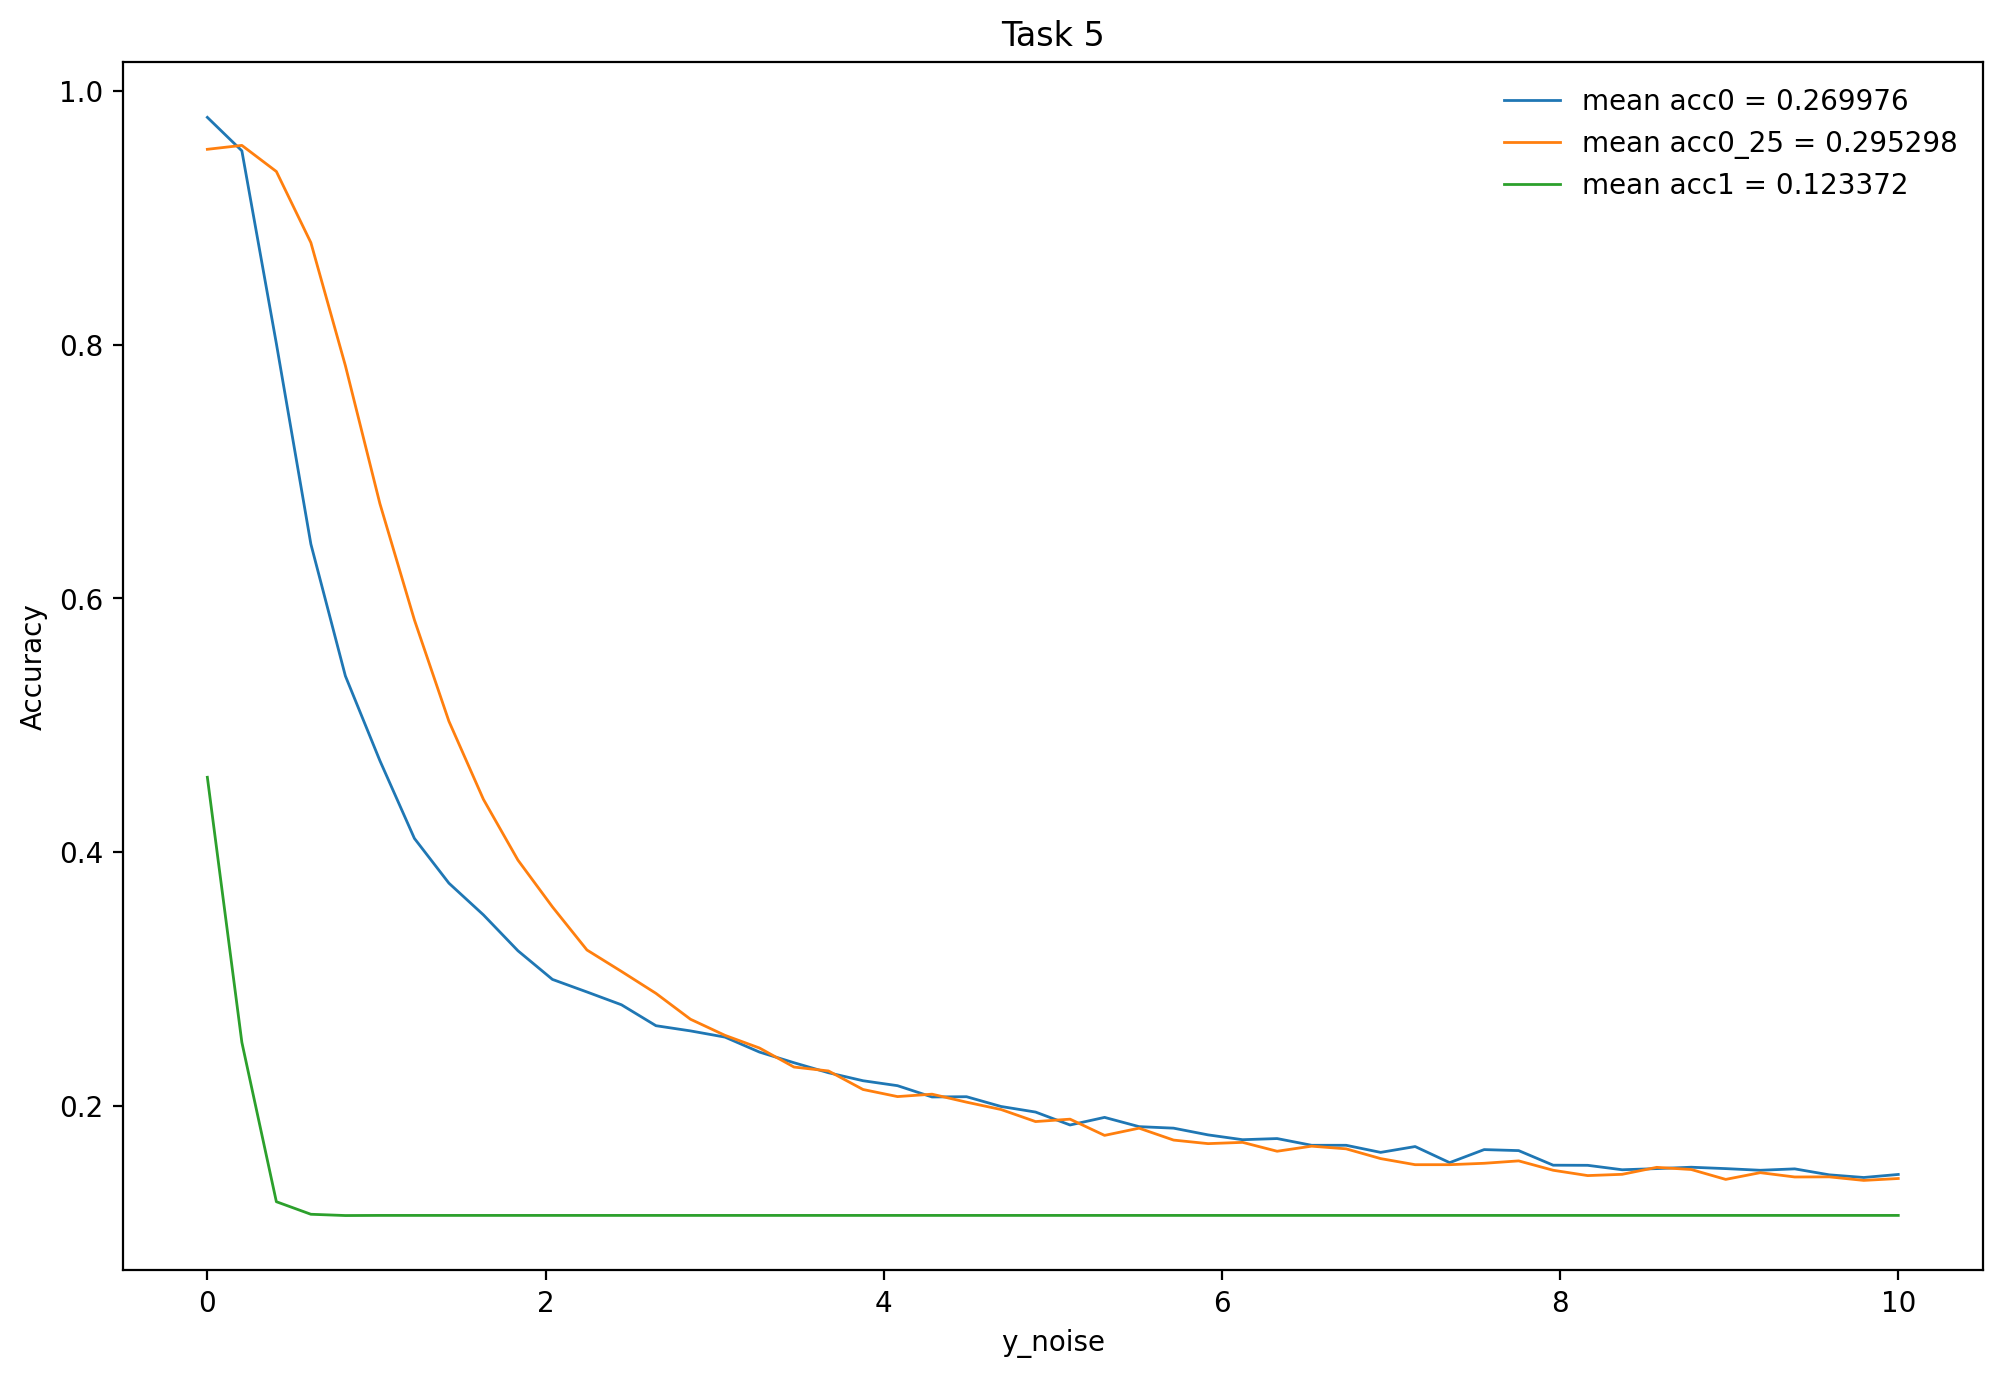

In [11]:
#***UPDATE BETWEEN RUNs***
tr_y_noise =0.25 #y_noise value for training set

#***UPDATE ARRAY NAME BETWEEN RUNS***
acc0_25 = []# empty list to collect test accuracy values

train_images_noise = add_noise(train_images, tr_y_noise)

#adapted from Week3_MNIST_TF.ipynb
history=model.fit(train_images_noise, train_labels,batch_size=100, epochs=30)

y_noise_array = np.linspace(0,10,50)# run from 0 to 10
for y_noise in y_noise_array: #repeating Task 3
  test_images_noise = add_noise(test_images, y_noise)
  test_loss, test_acc = model.evaluate(test_images_noise,  test_labels, verbose=2)

#***UPDATE ARRAY NAME BETWEEN RUNS***  
  acc0_25.append(test_acc)

#UPDATE NAMES BETWEEN RUNs
avg_acc0_25 = np.mean(acc0_25)


fig,ax=plt.subplots()
#***UPDATE AS DESIRED BETWEEN RUNS***
ax.plot(y_noise_array, acc0, linewidth=1, label=f'mean acc0 = {avg_acc0:0.6f}')
ax.plot(y_noise_array, acc0_25, linewidth=1, label = f'mean acc0_25 = {avg_acc0_25:0.6f}')
ax.plot(y_noise_array, acc1, linewidth=1, label = f'mean acc1 = {avg_acc1:0.6f}')
ax.set_xlabel("y_noise")
ax.set_ylabel("Accuracy")
ax.set_title('Task 5')
ax.legend();



# Task 5
tr_y_noise =0.25, improved performance across the board (except right at start) and mean was higher.
<p>tr_y_noise =0.5 was tried

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 2.8024 - accuracy: 0.2125
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 1.8727 - accuracy: 0.2792
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 2.0273 - accuracy: 0.2181
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 2.2061 - accuracy: 0.1453
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 2.2730 - accuracy: 0.1225
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 2.2098 - accuracy: 0.1547
Epoch 7/30
600/600 [==============================] - 2s 2ms/step - loss: 2.3040 - accuracy: 0.1081
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3035 - accuracy: 0.1063
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3033 - accuracy: 0.1076
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3033 - accuracy: 0.1081

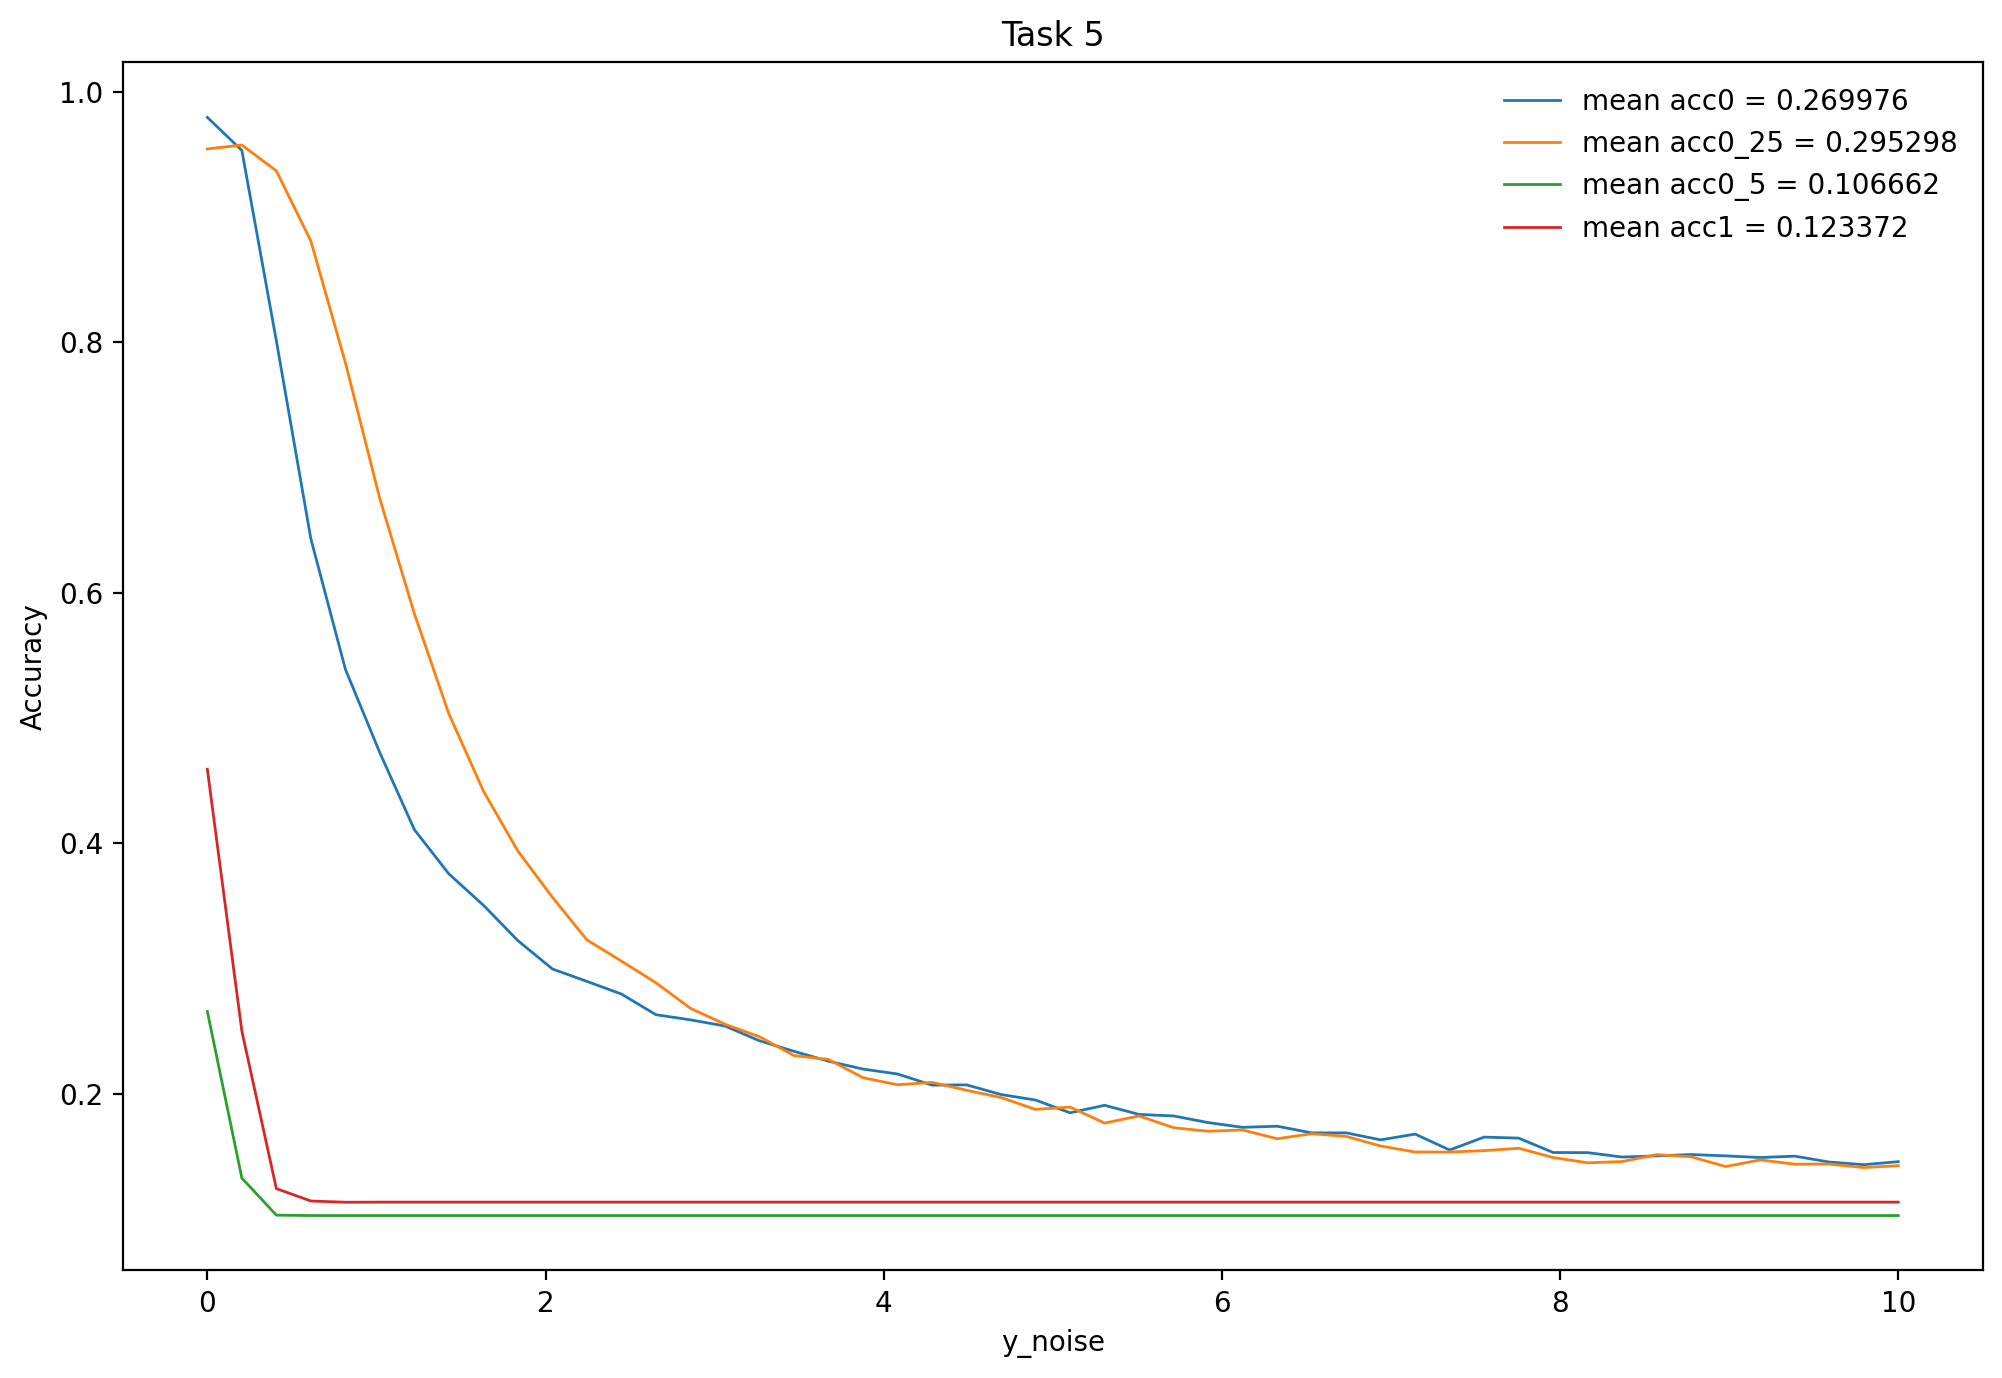

In [12]:
#***UPDATE BETWEEN RUNs***
tr_y_noise =0.5 #y_noise value for training set

#***UPDATE ARRAY NAME BETWEEN RUNS***
acc0_5 = []# empty list to collect test accuracy values

train_images_noise = add_noise(train_images, tr_y_noise)

#adapted from Week3_MNIST_TF.ipynb
history=model.fit(train_images_noise, train_labels,batch_size=100, epochs=30)

y_noise_array = np.linspace(0,10,50)# run from 0 to 10
for y_noise in y_noise_array: #repeating Task 3
  test_images_noise = add_noise(test_images, y_noise)
  test_loss, test_acc = model.evaluate(test_images_noise,  test_labels, verbose=2)

#***UPDATE ARRAY NAME BETWEEN RUNS***  
  acc0_5.append(test_acc)

#UPDATE NAMES BETWEEN RUNs
avg_acc0_5 = np.mean(acc0_5)


fig,ax=plt.subplots()
#***UPDATE AS DESIRED BETWEEN RUNS***
ax.plot(y_noise_array, acc0, linewidth=1, label=f'mean acc0 = {avg_acc0:0.6f}')
ax.plot(y_noise_array, acc0_25, linewidth=1, label = f'mean acc0_25 = {avg_acc0_25:0.6f}')
ax.plot(y_noise_array, acc0_5, linewidth=1, label = f'mean acc0_5 = {avg_acc0_5:0.6f}')
ax.plot(y_noise_array, acc1, linewidth=1, label = f'mean acc1 = {avg_acc1:0.6f}')
ax.set_xlabel("y_noise")
ax.set_ylabel("Accuracy")
ax.set_title('Task 5')
ax.legend();


# Task 5 Conclusions
Performance at tr_y_noise = 0.5, provided poor performance and in fact worse performance than tr_y_noise = 1. Not too much should be written into that second fact as the models perform differently on different runs and in any case their means are close.

The mean of the accuracy across the range was a useful measurement of the performance of the models. It captures the performance in a single number which can be compared between models.

Some time was spent looking at different tr_y_noise values (available on request), but results were unreliable due to models performing differently on different runs with the same tr_y_noise. If the training model got off to a bad start (as demonstrated by low accuracy on Epoch 1) they would never provide a good fit. This seemed particularly true for high tr_y_noise models, which were particularly unstable. On rare occassions, high tr_y_noise models, would provide high performing models. More of that not, though, they would be poor performers. This may not be surprising given the high level of noise introduced.  

In conclusion, in this modeling assignment, adding a small amount of noise to a training sample (in our case tr_y_noise = 0.25) improves the performance of the model in identifying categories into a noisy test_sample. On the measure shown, the performance shown improved by a factor of 9% from a mean accuracy of 27% to 30%. On a previous run of the whole notebook, performance improved by a factor of 66% from a mean accuracy of 18% to 30%. This demonstrates the instability of the model runs, but does suggest that improvements in performance can be acheived with small additions of noise into the training sample.

Why should this be? 
Professor Florian Marquart in his lecture "Machine Learning for Physicists (Lecture 4)" explains that adding noise to a network can be beneficial. He is using the specific example of dropout techniques, but explains that it is a general observation that adding noise into a network can help a model to not just memorize the precise values of pixels. Instead it will train itself on more robust overall features and this alleviates overfitting.
https://www.youtube.com/watch?v=ens7rnhk0e0&ab_channel=FlorianMarquardt